# CPSC 420 - HW1

In [12]:
import Pkg
Pkg.add("Interact")
Pkg.add("LinearAlgebra")
Pkg.add("JLD")
Pkg.add("Plots")
Pkg.add("Polynomials")

 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


## Q1.

### a.

Multiplying the first row of $\textbf{R}$ with $\textbf{x}$ gives us $R_{1,1} \cdot x_1 = b_1$. So $x_1 = \frac{b_1}{R_{1,1}}$. We can find $x_i$ similarly, using the $i^{th}$ row. $\sum_{j=1}^i R_{i,j} \cdot x_j = b_i$. Rearranging gives us $x_i = \frac{b_i - \sum_{j=1}^{i-1} R_{j,i} \cdot x_j}{R_{i,i}}$.

### b.

Multiplying the last row of $\textbf{R}$ with $\textbf{x}$ gives us $R_{n,n} \cdot x_n = b_n$. So $x_n = \frac{b_n}{R_{n,n}}$. We can find $x_i$ similarly, using the $i^{th}$ row. $\sum_{j=i}^n R_{i,j} \cdot x_j = b_i$. Rearranging gives us $x_i = \frac{b_i - \sum_{j=i+1}^n R_{j,i} \cdot x_j}{R_{i,i}}$.

## Q2.

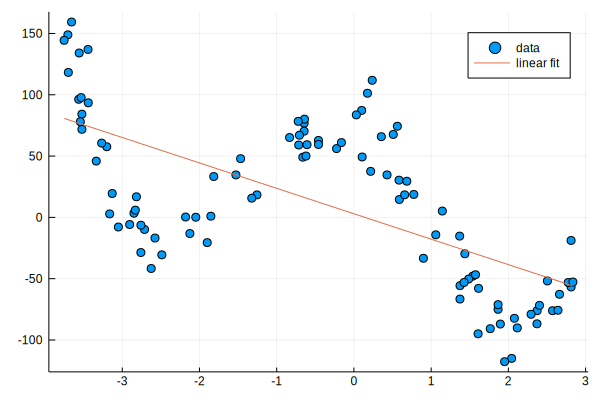

In [35]:
using JLD, Plots, Interact, Polynomials

v = load("hw1_p2_data.jld", "data")

z = v[:, 1]
y = v[:, 2]

xlim = z
ylim = y
scatter(z, y, label="data")

xlim = (-3.75, 2.83)

pp = polyfit(z, y, 1)
display(plot!( t->pp(t), xlim... , label="linear fit"))

## Q3.

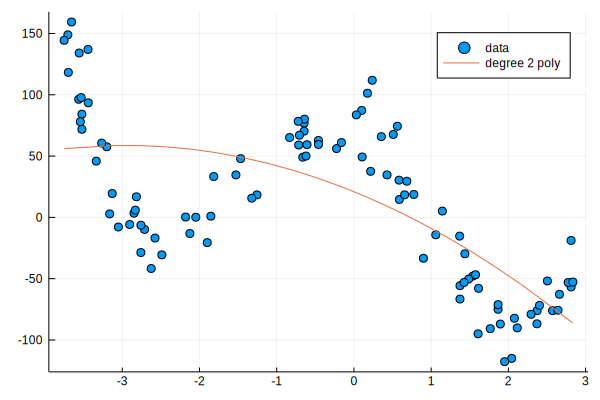

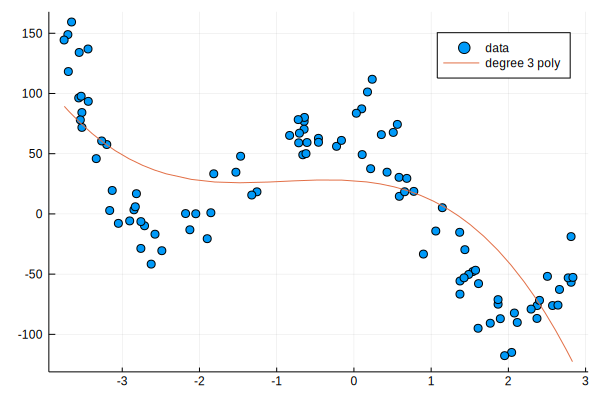

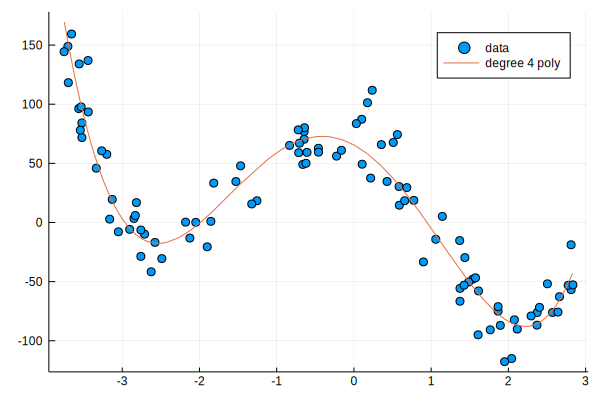

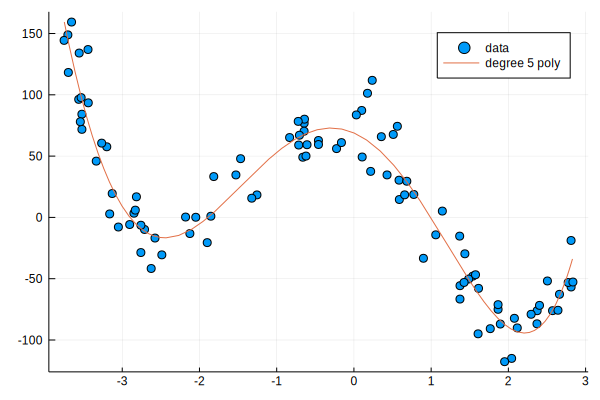

In [41]:
using JLD, Plots, Interact, LinearAlgebra, Polynomials

v = load("hw1_p2_data.jld", "data")

z = v[:, 1]
y = v[:, 2]

xlim = z
ylim = y
scatter(z, y, label="data")

xlim = (-3.75, 2.83)

# Compute polynomial fit
for d in 2:5 # degree of fit
    pp = polyfit(z, y, d)
    scatter(z, y, label="data")
    display(plot!(t->pp(t), xlim..., label="degree $(d) poly" ))
end

## Q4.

### a.

First, note that we can do a QR-decomposition as described in class on $A^T$, because it has $m>n$ (because its rows and columns are flipped compared with $A$).

So let $QR = A^T$. Then $A = (QR)^T = R^TQ^T$, where $R = \begin{bmatrix} \hat{R} \\ 0 \end{bmatrix}$, and $\hat{R}$ is square upper triangular.

Then $Ax = R^TQ^Tx = b$.

$\begin{bmatrix} \hat{R}^T & 0 \end{bmatrix} Q^T x = b$

$\begin{bmatrix} \hat{R}^{-T} \\ 0 \end{bmatrix} \begin{bmatrix} \hat{R}^T & 0 \end{bmatrix} Q^T x = \begin{bmatrix} \hat{R}^{-T} \\ 0 \end{bmatrix} b$

$Q^T x = \begin{bmatrix} \hat{R}^{-T}b \\ 0 \end{bmatrix}$

$QQ^T x = Q\begin{bmatrix} \hat{R}^{-T}b \\ 0 \end{bmatrix}$

so the least-squares problem becomes:

$x = Q\begin{bmatrix} \hat{R}^{-T}b \\ 0 \end{bmatrix}$

### b.

In [45]:
m = 10
n = 20
A = randn(m,n)
x = randn(n)
b = A*x       
f = qrfact(tr(A))

DimensionMismatch: DimensionMismatch("matrix is not square: dimensions are (10, 20)")

### c.

From part $\textit{a.}$ we know

$x = Q\begin{bmatrix} \hat{R}^{-T}b \\ 0 \end{bmatrix}$

so minimizing this gives:

$\min ||x|| = \min || Q\begin{bmatrix} \hat{R}^{-T}b \\ 0 \end{bmatrix} ||$

$\min || \begin{bmatrix} \hat{R}^{-T}b \\ 0 \end{bmatrix} || = min \begin{bmatrix} \hat{R}^{-T}b \\ 0 \end{bmatrix}^T \begin{bmatrix} \hat{R}^{-T}b \\ 0 \end{bmatrix} $

$\min \begin{bmatrix} b^T\hat{R}^{-1} & 0 \end{bmatrix} \begin{bmatrix} \hat{R}^{-T}b \\ 0 \end{bmatrix} $

$\min b^T\hat{R}^{-1}\hat{R}^{-T}b$


